In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score


dataset = pd.read_csv('emails.csv')
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data = dataset.copy().drop(columns='Email No.')
train, test = train_test_split(data, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['Prediction']) ,train['Prediction']
X_test, y_test = test.drop(columns=['Prediction']), test['Prediction']

In [4]:
cls = LogisticRegression(max_iter=4000)
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       736
           1       0.94      0.96      0.95       299

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



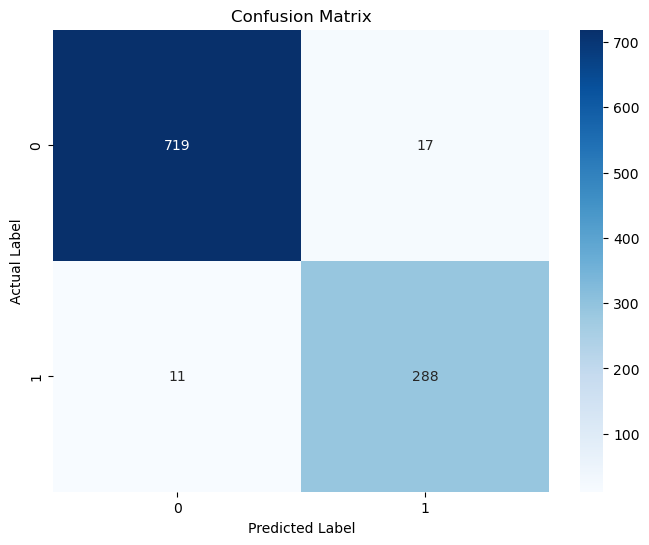

In [5]:
y_pred = cls.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

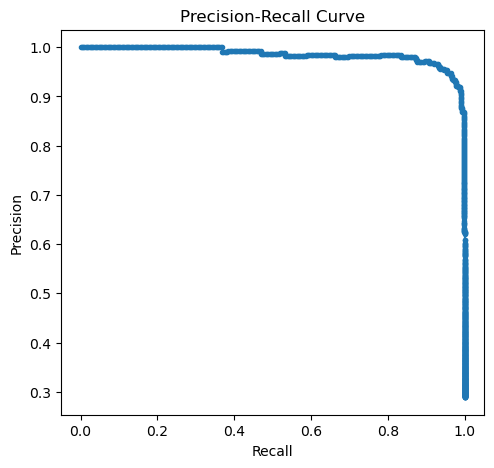

In [6]:


# Assuming X_test, y_test, and cls are already defined as per the user's code snippet
y_pred = cls.predict(X_test)
y_score = cls.decision_function(X_test)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Precision-Recall Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')


plt.show()

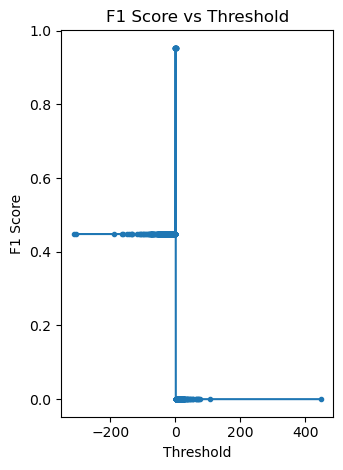

In [7]:
f1_scores = [f1_score(y_test, y_pred > thresh) for thresh in thresholds]
# F1 Score Plot
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

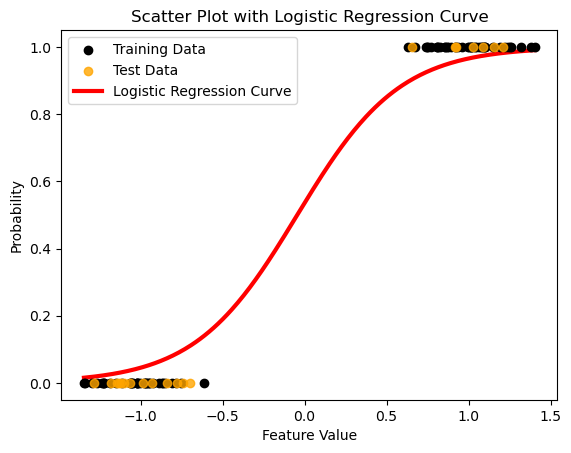

In [11]:
# For reproducibility
np.random.seed(0)

# Generating synthetic binary classification data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create a sequence of numbers from the smallest X to the largest X
X_plot = np.linspace(X.min(), X.max(), 300)

# Predict probabilities for the sequence
y_plot = model.predict_proba(X_plot.reshape(-1, 1))[:, 1]

# Plot the scatter plot for the actual data points
plt.scatter(X_train, y_train, color='black', zorder=20, label='Training Data')
plt.scatter(X_test, y_test, color='orange', zorder=20, label='Test Data', alpha=0.8)

# Plot the logistic regression curve
plt.plot(X_plot, y_plot, color='red', linewidth=3, label='Logistic Regression Curve')

# Labeling the plot
plt.xlabel('Feature Value')
plt.ylabel('Probability')
plt.title('Scatter Plot with Logistic Regression Curve')
plt.legend()

# Show the plot
plt.show()